In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

2023-11-20 10:19:18.734422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 10:19:19.547146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path = "clothing-dataset-small/train/t-shirt/"
name = "00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg"
x = load_img(path+name, target_size=(299,299))
x = np.array(x)

In [4]:
# pretrained model
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3),
)

In [6]:
xtp = preprocess_input(np.array([x]))
decode_predictions(model.predict(xtp))

1/1 [==============================] - 1s 565ms/step


[[('n03595614', 'jersey', 0.88693106),
  ('n02730930', 'apron', 0.0062796813),
  ('n04235860', 'sleeping_bag', 0.0059950836),
  ('n04456115', 'torch', 0.0058024796),
  ('n03710637', 'maillot', 0.005754734)]]

In [7]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds=train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [27]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [8]:
x,y = next(train_ds)
x.shape

(32, 150, 150, 3)

In [9]:
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_ds=train_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [15]:
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(x)
preds.shape

1/1 [==============================] - 1s 893ms/step


(32, 10)

In [18]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(
   optimizer=optimizer,
   loss=loss,
   metrics=['accuracy'] 
)

history = model.fit(
    train_ds, 
    epochs=3,
    validation_data=valid_ds
)

Epoch 1/3


2023-11-20 10:28:59.402646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 0.8893 - accuracy: 0.7787

2023-11-20 10:29:42.019924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 48s 472ms/step - loss: 0.8893 - accuracy: 0.7787 - val_loss: 1.0447 - val_accuracy: 0.7595
Epoch 2/3
96/96 [==============================] - 45s 471ms/step - loss: 0.4356 - accuracy: 0.8690 - val_loss: 0.8740 - val_accuracy: 0.7918
Epoch 3/3
96/96 [==============================] - 42s 441ms/step - loss: 0.2602 - accuracy: 0.9117 - val_loss: 0.9076 - val_accuracy: 0.7977


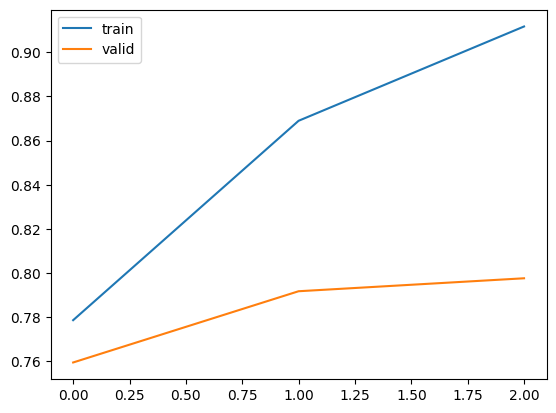

In [20]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend();

In [21]:
def make_model(learning_rate = 0.01):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150,150,3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'] 
    )

    return model

In [22]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(
        train_ds, 
        epochs=3,
        validation_data=valid_ds
    )
    scores[lr] = history.history['val_accuracy']
    print()

0.0001
Epoch 1/3


2023-11-20 10:58:38.325915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 1.8543 - accuracy: 0.3797

2023-11-20 10:59:16.562475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 43s 425ms/step - loss: 1.8543 - accuracy: 0.3797 - val_loss: 1.5088 - val_accuracy: 0.5249
Epoch 2/3
96/96 [==============================] - 41s 427ms/step - loss: 1.3554 - accuracy: 0.5766 - val_loss: 1.1940 - val_accuracy: 0.6276
Epoch 3/3
96/96 [==============================] - 42s 434ms/step - loss: 1.1295 - accuracy: 0.6473 - val_loss: 1.0316 - val_accuracy: 0.7009
Epoch 1/3


2023-11-20 11:00:43.854217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 0.9969 - accuracy: 0.6890

2023-11-20 11:01:24.144731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 44s 461ms/step - loss: 0.9969 - accuracy: 0.6890 - val_loss: 0.9243 - val_accuracy: 0.7361
Epoch 2/3
96/96 [==============================] - 45s 465ms/step - loss: 0.9065 - accuracy: 0.7181 - val_loss: 0.8600 - val_accuracy: 0.7449
Epoch 3/3
96/96 [==============================] - 47s 486ms/step - loss: 0.8402 - accuracy: 0.7334 - val_loss: 0.8085 - val_accuracy: 0.7537

0.001
Epoch 1/3


2023-11-20 11:03:00.992236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 1.0674 - accuracy: 0.6375

2023-11-20 11:03:45.206502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 50s 502ms/step - loss: 1.0674 - accuracy: 0.6375 - val_loss: 0.7014 - val_accuracy: 0.7801
Epoch 2/3
96/96 [==============================] - 47s 485ms/step - loss: 0.6300 - accuracy: 0.7836 - val_loss: 0.6030 - val_accuracy: 0.7977
Epoch 3/3
96/96 [==============================] - 46s 484ms/step - loss: 0.5057 - accuracy: 0.8299 - val_loss: 0.5669 - val_accuracy: 0.8065
Epoch 1/3


2023-11-20 11:05:24.481083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8644

2023-11-20 11:06:10.182196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 51s 526ms/step - loss: 0.4298 - accuracy: 0.8644 - val_loss: 0.5473 - val_accuracy: 0.8152
Epoch 2/3
96/96 [==============================] - 46s 478ms/step - loss: 0.3721 - accuracy: 0.8856 - val_loss: 0.5348 - val_accuracy: 0.8211
Epoch 3/3
96/96 [==============================] - 49s 509ms/step - loss: 0.3279 - accuracy: 0.9051 - val_loss: 0.5179 - val_accuracy: 0.8240

0.01
Epoch 1/3


2023-11-20 11:07:52.353089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 1.2401 - accuracy: 0.6786

2023-11-20 11:08:35.745971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 48s 485ms/step - loss: 1.2401 - accuracy: 0.6786 - val_loss: 1.0879 - val_accuracy: 0.7214
Epoch 2/3
96/96 [==============================] - 46s 482ms/step - loss: 0.5967 - accuracy: 0.8123 - val_loss: 0.9020 - val_accuracy: 0.7566
Epoch 3/3
96/96 [==============================] - 46s 478ms/step - loss: 0.3724 - accuracy: 0.8797 - val_loss: 0.7948 - val_accuracy: 0.7977
Epoch 1/3


2023-11-20 11:10:13.118300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9055

2023-11-20 11:10:53.561840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 45s 471ms/step - loss: 0.2709 - accuracy: 0.9055 - val_loss: 1.0584 - val_accuracy: 0.7507
Epoch 2/3
96/96 [==============================] - 47s 483ms/step - loss: 0.1902 - accuracy: 0.9335 - val_loss: 0.9395 - val_accuracy: 0.8035
Epoch 3/3
96/96 [==============================] - 47s 488ms/step - loss: 0.1411 - accuracy: 0.9485 - val_loss: 0.8184 - val_accuracy: 0.7947

0.1
Epoch 1/3


2023-11-20 11:12:33.862455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 11.9605 - accuracy: 0.6232

2023-11-20 11:13:13.416647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 44s 445ms/step - loss: 11.9605 - accuracy: 0.6232 - val_loss: 7.2875 - val_accuracy: 0.7449
Epoch 2/3
96/96 [==============================] - 46s 484ms/step - loss: 4.7860 - accuracy: 0.7832 - val_loss: 6.7179 - val_accuracy: 0.7595
Epoch 3/3
96/96 [==============================] - 47s 489ms/step - loss: 3.2800 - accuracy: 0.8400 - val_loss: 8.1032 - val_accuracy: 0.7683
Epoch 1/3


2023-11-20 11:14:51.907184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - ETA: 0s - loss: 2.8785 - accuracy: 0.8572

2023-11-20 11:15:33.390934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


96/96 [==============================] - 46s 478ms/step - loss: 2.8785 - accuracy: 0.8572 - val_loss: 8.5593 - val_accuracy: 0.7742
Epoch 2/3
96/96 [==============================] - 45s 465ms/step - loss: 1.8185 - accuracy: 0.8908 - val_loss: 8.1903 - val_accuracy: 0.7859
Epoch 3/3
96/96 [==============================] - 48s 496ms/step - loss: 1.5851 - accuracy: 0.9061 - val_loss: 8.9990 - val_accuracy: 0.7478



In [ ]:
for lr, hist in scores.items():
    # plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="valid")
    plt.legend();